In [ ]:
df = pd.read_csv("/content/spotify_dataset.csv" , encoding='latin-1')
df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",MÃ¥neskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats


#for data visulization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from matplotlib.pyplot import figure
!pip install dateutil
import pandas as pd
from dateutil.parser import parse
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib Invalid

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [ ]:
#number of times charted by artist

In [ ]:
df_numbercharted = df.groupby('Artist').sum().sort_values('Number of Times Charted', ascending=False)
df_numbercharted = df_numbercharted.reset_index()
df_numbercharted


<ipython-input-25-e2107b4ca866>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_numbercharted = df.groupby('Artist').sum().sort_values('Number of Times Charted', ascending=False)


,Artist,Index,Highest Charting Position,Number of Times Charted
0,Billie Eilish,13908,1136,432
1,Juice WRLD,25342,1755,431
2,Harry Styles,1990,139,364
3,Ed Sheeran,4440,657,314
4,Pop Smoke,17702,2420,308
...,...,...,...,...
711,"KALIM, Ufo361",1143,183,1
712,"Kane Brown, blackbear",231,187,1
713,Kehlani,1191,177,1
714,"Kygo, Donna Summer",897,194,1


In [ ]:
#graph
px.bar(x='Artist', y = 'Number of Times Charted', data_frame=df_numbercharted.head(7),title="Top 7 Artist with Heighest Number of Charted")

In [ ]:
df=df.fillna(' ')
df=df.replace(' ' , ' ')
df['Streams']=df['Streams'].str.replace(',' , ' ')

In [ ]:
#now convert all coloumns to numeric
df[['Highest Charting Position', 'Number of Times Charted','Streams','Popularity','Danceability','Energy','Loudness','Speechiness','Tempo','Valence',]] =df[['Highest Charting Position', 'Number of Times Charted','Streams','Popularity','Danceability','Energy','Loudness','Speechiness','Tempo','Valence',]].apply(pd.to_numeric, errors='coerce')

In [ ]:
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

<ipython-input-53-6a88bf3eaf8c>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<function matplotlib.pyplot.show(close=None, block=None)>

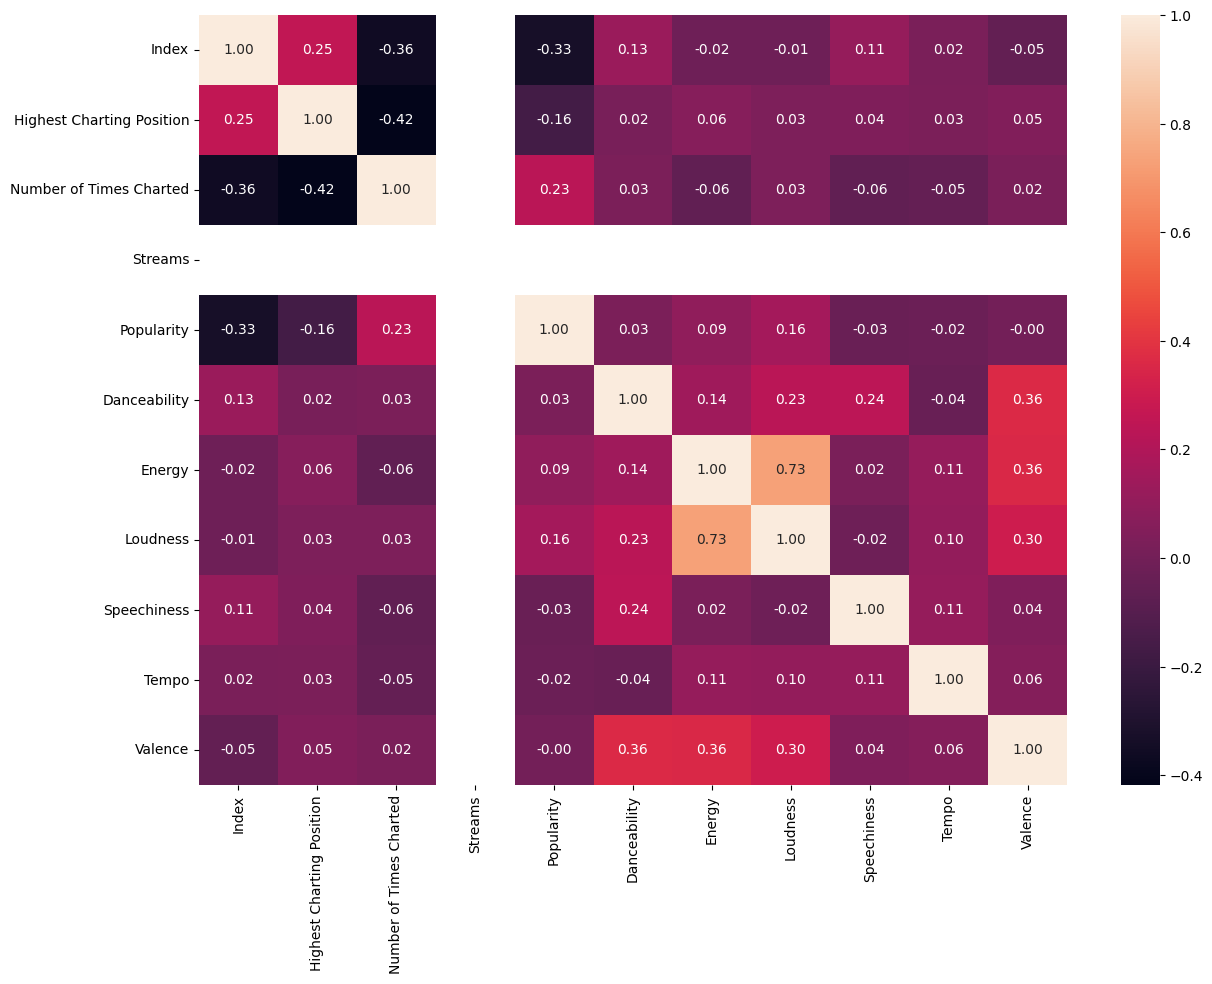

In [ ]:
%matplotlib inline
f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f" , ax=ax)
plt.show

In [ ]:
import plotly.express as px
px.line(x='Release Date', y='Danceability',data_frame=df, title="Danceability over the course of the year")

In [ ]:
import plotly.express as px
px.line(x='Release Date', y='Popularity', data_frame=df, title="Popularity over the course of the year")